# Classification naïve bayésienne


La classification naïve bayésienne est **un type de classification probabiliste simple basée sur le théorème de Bayes** avec une forte indépendance (dite naïve) des hypothèses. Elle met en œuvre un classifieur bayésien naïf, ou classifieur naïf de Bayes, appartenant à la famille des classifieurs linéaires.

On peut écrire notre modèle conditionnel tel que  $p(C\vert F_{1},\dots ,F_{n})\,$, 
où $C$ est une variable de classe dépendante dont les instances ou classes sont peu nombreuses, conditionnée par plusieurs variables caractéristiques $F1,...,Fn$. 

À l'aide du théorème de Bayes, nous écrivons : 

$$p(C\vert F_{1},\dots ,F_{n})={\frac  {p(C)\ p(F_{1},\dots ,F_{n}\vert C)}{p(F_{1},\dots ,F_{n})}}.\,$$

dans le langage courant on peut résumer cette équation par : 

$${\mbox{postérieure}}={\frac  {{\mbox{antérieure}}\times {\mbox{vraisemblance}}}{{\mbox{évidence}}}}.\,$$

Il est important que les variables explicatives soient indépendantes, si ce n’est pas le cas le modèle aura plus de mal à prédire correctement la variable cible ! 



## Avantages du modèle Naive Bayes

Le modèle Naive Bayes est un modèle qui présente naturellement un biais important et une faible variance, il est donc idéal pour entraîner des modèles sur de faibles volumes de données. Il ne nécessite pas de choisir la forme de la fonction qui lie $X$ et $Y$ et peut donc s’adapter à des problèmes non linéaires.


## Inconvénients de Naive Bayes

De part son biais élevé, le modèle Naive Bayes n’est pas idéal lorsque le volume de données devient élevé car il ne permettra pas d’atteindre les meilleurs performances possibles, contrairement aux Random Forests. 

Les classifieurs bayésiens traitent également chaque variable indépendamment, il ne pourra donc pas prendre en compte des informations issues de l'interaction entre plusieurs variables.


## Le dataset 

Le jeu de données `pima-indians-diabetes` provient de l'Institut national du diabète et des maladies digestives et rénales. L'objectif de l'ensemble de données est de **prédire de manière diagnostique si un patient est diabétique ou non, en fonction de certaines mesures de diagnostic incluses dans l'ensemble de données**. Plusieurs contraintes ont été placées sur la sélection de ces instances dans une base de données plus grande. En particulier, tous les patients ici sont des femmes d’au moins 21 ans et d’origine indienne Pima.
Ci-dessous, le nom des colonnes : 

```
columns={0:'Pregnancies',
         1:'Glucose',
         2:'BloodPressure', 
         3:'SkinThickness', 
         4:'Insulin',
         5:'BMI',
         6:'DiabetesPedigreeFunction',
         7:'Age',
         8:'Outcome'}
```


In [1]:
#importer vos lib
import pandas as pd 
import numpy as np 
import seaborn as sns
import sklearn as sklearn
import warnings
warnings.simplefilter(action='ignore')


In [2]:
#importer le dataset pima-indians-diabetes
columns={0:'Pregnancies',
         1:'Glucose',
         2:'BloodPressure', 
         3:'SkinThickness', 
         4:'Insulin',
         5:'BMI',
         6:'DiabetesPedigreeFunction',
         7:'Age',
         8:'Outcome'}
df = pd.read_csv('diabetes.csv', sep=','); df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#afficher les stats descriptives du dataset 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#construire un nouveau dataset en supprimant les 0 dans les lignes
#afficher les statistique de ce nouveau dataset 
df = df[df.Glucose != 0]
df = df[df.BloodPressure != 0]
df = df[df.SkinThickness != 0]
df = df[df.Insulin != 0]
df = df[df.BMI != 0]
df = df[df.DiabetesPedigreeFunction != 0]
df = df[df.Age != 0]
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


## Les valeurs abérrantes 

Nous allons nous basé sur la mesure de l'écart interquartile. Par exemple, si ${\displaystyle Q_{1}} et {\displaystyle Q_{3}}$ sont respectivement le premier quartile et le troisième quartile, alors on peut définir une donnée aberrante comme étant toute valeur située à l'extérieur de l'intervalle: $${\displaystyle {\big [}Q_{1}-k(Q_{3}-Q_{1}) ; Q_{3}+k(Q_{3}-Q_{1}){\big ]}}$$
avec $k$ une constante positive. 

In [6]:
#créer la variable q1 correspondant au premier quantile de la variable 'Insulin'
q1 = df['Insulin'].quantile(.25)

In [7]:
#créer la variable q3 correspondant au troisième quantile de la variable 'Insulin'
q3 = df['Insulin'].quantile(.75)

In [8]:
#définir l'intervalle énoncé ci-dessus avec k=1.5
#afficher l'intervalle 
#que remarquez vous ? 
print("Intervalle interquartile : [{} ; {}] ".format(q1-1.5*(q3-q1),q3+1.5*(q3-q1)))

Intervalle interquartile : [-93.125 ; 359.875] 


In [9]:
#afficher ces individus par classe 

df.where(df['Insulin'] > (q3+1.5*(q3-q1)))['Outcome'].value_counts()

1.0    15
0.0    10
Name: Outcome, dtype: int64

In [10]:
#définir un masque dans votre dataset afin de filtrer les individus dépassant la borne supérieur 
#prendre k=1.5
sup = q3+1.5*(q3-q1)
df['insulin_ab'] = df['Insulin'] > sup
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Insulin'>

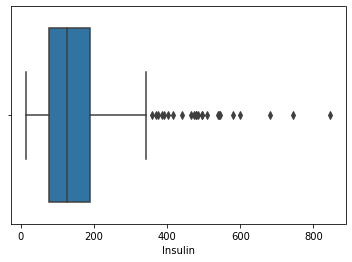

In [11]:
#afficher une boxplot de votre variable 
#que remarquez vous ? 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(x="Insulin", data=df)

In [12]:
#créer un nouveau dataset pour les individus abérrants 


In [13]:
#afficher votre dataset 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin_ab
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False
6,3,78,50,32,88,31.0,0.248,26,1,False
8,2,197,70,45,543,30.5,0.158,53,1,True
13,1,189,60,23,846,30.1,0.398,59,1,True


## Indépendance, corrélation et normalité 

In [14]:
#effectuer des test de student sur vos variables 2 à 2 
#ranger les résultat des test dans un tableau appelé test_result
#utiliser la méthode ttest_ind de scipy
from scipy import stats
stats.ttest_ind(df['Pregnancies'],df['DiabetesPedigreeFunction'], equal_var=True)

Ttest_indResult(statistic=17.028438328149868, pvalue=1.5150486355681567e-55)

In [74]:
test_result = []
test_aff = []
for i in range(7,-1,-1):
    for j in range(i-1,-1,-1):
        test = stats.ttest_ind(df.iloc[:,i],df.iloc[:,j], equal_var=True)
        test_result.append(test.pvalue)
        test_aff.append([df.columns[i],df.columns[j],test.pvalue])


In [75]:
#afficher votre vecteur test_result
#que marquez vous ?        
print(test_result)
print(test_aff)

[1.566524150875076e-289, 0.0004073494231140429, 1.0405923224374392e-76, 0.020405620780744614, 8.816906816842837e-240, 2.2952683930405666e-275, 4.406915246297507e-251, 0.0, 2.3544133333180735e-107, 2.4148763014873583e-265, 0.0, 0.0, 1.5150486355681567e-55, 8.560440687697286e-75, 1.103926415575936e-09, 1.744005600421618e-255, 6.319059757603311e-276, 0.0, 2.394527471199125e-78, 1.247189726766044e-40, 9.314347797149483e-08, 1.7053260837106893e-104, 1.7463327204409502e-247, 1.387052889778928e-279, 1.6152588081812398e-227, 1.2006169214139294e-137, 0.0, 0.0]
[['Age', 'DiabetesPedigreeFunction', 1.566524150875076e-289], ['Age', 'BMI', 0.0004073494231140429], ['Age', 'Insulin', 1.0405923224374392e-76], ['Age', 'SkinThickness', 0.020405620780744614], ['Age', 'BloodPressure', 8.816906816842837e-240], ['Age', 'Glucose', 2.2952683930405666e-275], ['Age', 'Pregnancies', 4.406915246297507e-251], ['DiabetesPedigreeFunction', 'BMI', 0.0], ['DiabetesPedigreeFunction', 'Insulin', 2.3544133333180735e-107]

In [76]:
#afficher la taille du vecteur test_result
#que remarquez vous ? 
len(test_result)

28

In [ ]:
#La pvalue permet de faire de la feature selection en gardant les plus petites valeurs. On peut par exemple supprimer du model les plus élevées.

In [77]:
#faite de meme avec la corrélation des variables 2 à 2 
#utiliser la méthode corrcoef de numpy
R1 = np.corrcoef(test_result)
R1

1.0

In [78]:
#afficher votre tableau de corrélation 
df.iloc[:,-10:].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin_ab
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566,0.008055
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703,0.336119
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673,0.002860
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936,0.096780
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429,0.763365
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118,0.092883
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330,0.055607
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804,0.063924
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000,0.148775
insulin_ab,0.008055,0.336119,0.002860,0.096780,0.763365,0.092883,0.055607,0.063924,0.148775,1.000000


<AxesSubplot:>

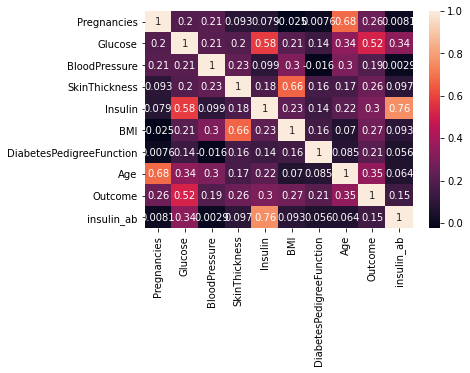

In [79]:
#afficher une heatmap de corrélation et vérifier votre tableau ci-dessus 
sns.heatmap(df.iloc[:,-10:].corr(), annot=True)

In [81]:
#calculer un tableau des informations mutuelles des variables 2 à 2 
#utiliser la méthode mutual_info_regression de sklearn  
sklearn.mutual_info_regression(test_result)

AttributeError: module 'sklearn' has no attribute 'mutual_info_regression'

In [22]:
#afficher votre tableau 


In [23]:
#separer votre dataset en 2 
#un dataset pour les positif (outcome==1)
#un dataset pour les négatifs (outcome==0)


In [24]:
#vérifier la séparation en affichant votre dataset


In [25]:
#vérifier la séparation en affichant votre dataset


In [26]:
#afficher une lois normal de size=10000


In [27]:
#tester la normalité de sur nos données des positifs  
#faire une boucle sur votre dataset 
#appliquer la méthode normaltest de scipy 
#enfin stocker la p-value associé dans une liste 


In [28]:
#faire la meme chose sur les données des négatifs 


In [29]:
#afficher le tableau des p-value pour l'ensemble des négatifs 
#que remarquez vous ? 


In [30]:
#vérifier à l'aide de plot vos hypothèse ci-dessus 
#prendre bins=10 pour le plot 
#que pouvez vous en déduire quant à la p-value ? 


In [31]:
#séparer votre jeux de donnée en deux ensemble de train test
#vous prendrez les paramètres : random_state = 42 et test_size = 0.3


In [32]:
#instancier un naive bayes estimator 


In [33]:
#fiter sur les données d'entrainement (de base pas celle extrapolés) et afficher le score du modèle 


In [34]:
#créer un nouveau dataframe à partir du dataset de test noté control 
#ajouter à ce datatset la colonne y := dataset ytest 
#ajouter à ce datatset la colonne y_pred := prediction de l'estimator 


In [35]:
#afficher la matrice de confusion 
#que remarquez vous ? 


## Bonus : création de nouvelles variables & bagging 

In [36]:
#discretiser votre ensemble d'entrainement 
#utiliser la méthode KBinsDiscretizer avec les paramètres présent dans l'output 


In [37]:
#fiter la méthode KBinsDiscretizer sur votre ensemble d'entrainement 


In [38]:
#utiliser votre fit afin de générer de nouveaux dataset de train et de test et dummifier le 


In [39]:
#afficher les shape de votre dataset de train de base et celle du nouveau dataset  
#pareil pour le test 


In [40]:
#afficher les colonnes de votre nouveau dataset de train


In [41]:
#fiter sur vos données d'entrainement extrapolés à l'aide du KBinsDiscretizer et afficher le score de ce modèle 
#que remarquez vous ? 


In [42]:
#utiliser le BaggingClassifier estimator de sklean et affciher l'accuracy du modèle 
